# Importing libraries

In [1]:
import spotipy # install if needed
from spotipy.oauth2 import SpotifyClientCredentials
import getpass
import pandas as pd
from unidecode import unidecode
from tqdm.notebook import tqdm

# Credentials

In [2]:
client_id = str(getpass.getpass('client_id?'))
client_secret = str(getpass.getpass('client_secret?'))

client_id?········
client_secret?········


In [3]:
sp=spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id,client_secret=client_secret))

# Playlists

## Hiphop Playlist

- **user name:** "Eric Peelen"
- **playlist id:** "2K31J2EjcYhKEDCh7Flli1"

In [4]:
def get_playlist_tracks(user_id,playlist_id):
    results=sp.user_playlist_tracks(user_id,playlist_id)
    tracks=results["items"]
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [5]:
results2=get_playlist_tracks("Eric Peelen","2K31J2EjcYhKEDCh7Flli1")

In [6]:
len(results2)

933

In [7]:
song_name=[]
song_ID=[]
song_artist=[]
playlist=results2

In [8]:
for r in results2: 
    song_ID.append(r["track"]["id"])

In [9]:
for r in results2: 
    song_name.append(r["track"]["name"])

In [10]:
for r in results2: 
    song_artist.append(r["track"]["artists"][0]["name"])

In [11]:
import pandas as pd

In [12]:
playlist_song_info=pd.DataFrame({"song_name":song_name,"song_ID":song_ID,"song_artist":song_artist})

In [13]:
playlist_song_info

,song_name,song_ID,song_artist
0,"Sing About Me, I'm Dying Of Thirst",1Z2FvDFZSDQ23s4BDqpWqZ,Kendrick Lamar
1,Yonkers,4OKXvqtfwlvY2fYJ2lzHPH,"Tyler, The Creator"
2,Angel Duster,0VLYOGNIaiOxEHKWOctcA4,Run The Jewels
3,Rhymes Like Dimes,12OkZyDWNBLUqoReoseGrc,MF DOOM
4,The Last to Say,4O7P2Rug3l4IySk0TEx4Xe,Atmosphere
...,...,...,...
928,A.P.I.D.T.A.,5wJC8qlivbwAx29bnTecSn,Jay Electronica
929,Dead Presidents,4sLFhYeZOLJ3G7XmVilAtr,J. Cole
930,Dead President Heads,7FUud32IMLTIwb1i5AOUNY,"Royce Da 5'9"""
931,Last Day (feat. The Lox) - 2014 Remaster,0iIZ1fqdUIfcE8CIndhlDD,The Notorious B.I.G.


In [14]:
feats1=sp.audio_features(tracks=song_ID[0:99])
feats2=sp.audio_features(tracks=song_ID[99:199])
feats3=sp.audio_features(tracks=song_ID[199:299])
feats4=sp.audio_features(tracks=song_ID[299:399])
feats5=sp.audio_features(tracks=song_ID[399:499])
feats6=sp.audio_features(tracks=song_ID[499:599])
feats7=sp.audio_features(tracks=song_ID[599:699])
feats8=sp.audio_features(tracks=song_ID[699:799])
feats9=sp.audio_features(tracks=song_ID[799:899])
feats10=sp.audio_features(tracks=song_ID[899:])

In [15]:
audio_feat_df1=pd.DataFrame(feats1)
audio_feat_df2=pd.DataFrame(feats2)
audio_feat_df3=pd.DataFrame(feats3)
audio_feat_df4=pd.DataFrame(feats4)
audio_feat_df5=pd.DataFrame(feats5)
audio_feat_df6=pd.DataFrame(feats6)
audio_feat_df7=pd.DataFrame(feats7)
audio_feat_df8=pd.DataFrame(feats8)
audio_feat_df9=pd.DataFrame(feats9)
audio_feat_df10=pd.DataFrame(feats10)


In [16]:
hiphop = pd.concat([audio_feat_df1,audio_feat_df2,audio_feat_df3,audio_feat_df4,audio_feat_df5,audio_feat_df6,audio_feat_df7,audio_feat_df8,audio_feat_df9,audio_feat_df10], axis=0)

In [17]:
hiphop = hiphop.reset_index(drop = True)

In [18]:
hiphop

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.654,0.753,11,-7.556,0,0.3950,0.3030,0.000081,0.130,0.3710,110.722,audio_features,1Z2FvDFZSDQ23s4BDqpWqZ,spotify:track:1Z2FvDFZSDQ23s4BDqpWqZ,https://api.spotify.com/v1/tracks/1Z2FvDFZSDQ2...,https://api.spotify.com/v1/audio-analysis/1Z2F...,723573,5
1,0.712,0.759,11,-5.397,1,0.3340,0.0160,0.080800,0.217,0.7380,79.103,audio_features,4OKXvqtfwlvY2fYJ2lzHPH,spotify:track:4OKXvqtfwlvY2fYJ2lzHPH,https://api.spotify.com/v1/tracks/4OKXvqtfwlvY...,https://api.spotify.com/v1/audio-analysis/4OKX...,249333,4
2,0.507,0.810,6,-6.840,1,0.1050,0.0030,0.000008,0.314,0.2070,175.710,audio_features,0VLYOGNIaiOxEHKWOctcA4,spotify:track:0VLYOGNIaiOxEHKWOctcA4,https://api.spotify.com/v1/tracks/0VLYOGNIaiOx...,https://api.spotify.com/v1/audio-analysis/0VLY...,309840,5
3,0.644,0.751,0,-5.652,1,0.2680,0.6620,0.000000,0.170,0.7590,99.948,audio_features,12OkZyDWNBLUqoReoseGrc,spotify:track:12OkZyDWNBLUqoReoseGrc,https://api.spotify.com/v1/tracks/12OkZyDWNBLU...,https://api.spotify.com/v1/audio-analysis/12Ok...,258613,4
4,0.684,0.397,2,-10.319,1,0.0809,0.2100,0.000000,0.235,0.0542,83.027,audio_features,4O7P2Rug3l4IySk0TEx4Xe,spotify:track:4O7P2Rug3l4IySk0TEx4Xe,https://api.spotify.com/v1/tracks/4O7P2Rug3l4I...,https://api.spotify.com/v1/audio-analysis/4O7P...,256348,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928,0.498,0.625,0,-10.678,1,0.3250,0.1450,0.004810,0.113,0.4030,129.779,audio_features,5wJC8qlivbwAx29bnTecSn,spotify:track:5wJC8qlivbwAx29bnTecSn,https://api.spotify.com/v1/tracks/5wJC8qlivbwA...,https://api.spotify.com/v1/audio-analysis/5wJC...,328366,4
929,0.680,0.671,0,-10.647,0,0.2590,0.2840,0.000000,0.274,0.6080,87.024,audio_features,4sLFhYeZOLJ3G7XmVilAtr,spotify:track:4sLFhYeZOLJ3G7XmVilAtr,https://api.spotify.com/v1/tracks/4sLFhYeZOLJ3...,https://api.spotify.com/v1/audio-analysis/4sLF...,189293,4
930,0.493,0.928,10,-3.781,0,0.3700,0.2400,0.000000,0.685,0.7510,93.309,audio_features,7FUud32IMLTIwb1i5AOUNY,spotify:track:7FUud32IMLTIwb1i5AOUNY,https://api.spotify.com/v1/tracks/7FUud32IMLTI...,https://api.spotify.com/v1/audio-analysis/7FUu...,404667,4
931,0.738,0.867,4,-5.298,0,0.3860,0.0145,0.000000,0.111,0.3550,93.706,audio_features,0iIZ1fqdUIfcE8CIndhlDD,spotify:track:0iIZ1fqdUIfcE8CIndhlDD,https://api.spotify.com/v1/tracks/0iIZ1fqdUIfc...,https://api.spotify.com/v1/audio-analysis/0iIZ...,259667,4


In [19]:
hiphop_df = pd.concat([playlist_song_info, hiphop], axis=1)

In [20]:
hiphop_df

,song_name,song_ID,song_artist,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,"Sing About Me, I'm Dying Of Thirst",1Z2FvDFZSDQ23s4BDqpWqZ,Kendrick Lamar,0.654,0.753,11,-7.556,0,0.3950,0.3030,...,0.130,0.3710,110.722,audio_features,1Z2FvDFZSDQ23s4BDqpWqZ,spotify:track:1Z2FvDFZSDQ23s4BDqpWqZ,https://api.spotify.com/v1/tracks/1Z2FvDFZSDQ2...,https://api.spotify.com/v1/audio-analysis/1Z2F...,723573,5
1,Yonkers,4OKXvqtfwlvY2fYJ2lzHPH,"Tyler, The Creator",0.712,0.759,11,-5.397,1,0.3340,0.0160,...,0.217,0.7380,79.103,audio_features,4OKXvqtfwlvY2fYJ2lzHPH,spotify:track:4OKXvqtfwlvY2fYJ2lzHPH,https://api.spotify.com/v1/tracks/4OKXvqtfwlvY...,https://api.spotify.com/v1/audio-analysis/4OKX...,249333,4
2,Angel Duster,0VLYOGNIaiOxEHKWOctcA4,Run The Jewels,0.507,0.810,6,-6.840,1,0.1050,0.0030,...,0.314,0.2070,175.710,audio_features,0VLYOGNIaiOxEHKWOctcA4,spotify:track:0VLYOGNIaiOxEHKWOctcA4,https://api.spotify.com/v1/tracks/0VLYOGNIaiOx...,https://api.spotify.com/v1/audio-analysis/0VLY...,309840,5
3,Rhymes Like Dimes,12OkZyDWNBLUqoReoseGrc,MF DOOM,0.644,0.751,0,-5.652,1,0.2680,0.6620,...,0.170,0.7590,99.948,audio_features,12OkZyDWNBLUqoReoseGrc,spotify:track:12OkZyDWNBLUqoReoseGrc,https://api.spotify.com/v1/tracks/12OkZyDWNBLU...,https://api.spotify.com/v1/audio-analysis/12Ok...,258613,4
4,The Last to Say,4O7P2Rug3l4IySk0TEx4Xe,Atmosphere,0.684,0.397,2,-10.319,1,0.0809,0.2100,...,0.235,0.0542,83.027,audio_features,4O7P2Rug3l4IySk0TEx4Xe,spotify:track:4O7P2Rug3l4IySk0TEx4Xe,https://api.spotify.com/v1/tracks/4O7P2Rug3l4I...,https://api.spotify.com/v1/audio-analysis/4O7P...,256348,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928,A.P.I.D.T.A.,5wJC8qlivbwAx29bnTecSn,Jay Electronica,0.498,0.625,0,-10.678,1,0.3250,0.1450,...,0.113,0.4030,129.779,audio_features,5wJC8qlivbwAx29bnTecSn,spotify:track:5wJC8qlivbwAx29bnTecSn,https://api.spotify.com/v1/tracks/5wJC8qlivbwA...,https://api.spotify.com/v1/audio-analysis/5wJC...,328366,4
929,Dead Presidents,4sLFhYeZOLJ3G7XmVilAtr,J. Cole,0.680,0.671,0,-10.647,0,0.2590,0.2840,...,0.274,0.6080,87.024,audio_features,4sLFhYeZOLJ3G7XmVilAtr,spotify:track:4sLFhYeZOLJ3G7XmVilAtr,https://api.spotify.com/v1/tracks/4sLFhYeZOLJ3...,https://api.spotify.com/v1/audio-analysis/4sLF...,189293,4
930,Dead President Heads,7FUud32IMLTIwb1i5AOUNY,"Royce Da 5'9""",0.493,0.928,10,-3.781,0,0.3700,0.2400,...,0.685,0.7510,93.309,audio_features,7FUud32IMLTIwb1i5AOUNY,spotify:track:7FUud32IMLTIwb1i5AOUNY,https://api.spotify.com/v1/tracks/7FUud32IMLTI...,https://api.spotify.com/v1/audio-analysis/7FUu...,404667,4
931,Last Day (feat. The Lox) - 2014 Remaster,0iIZ1fqdUIfcE8CIndhlDD,The Notorious B.I.G.,0.738,0.867,4,-5.298,0,0.3860,0.0145,...,0.111,0.3550,93.706,audio_features,0iIZ1fqdUIfcE8CIndhlDD,spotify:track:0iIZ1fqdUIfcE8CIndhlDD,https://api.spotify.com/v1/tracks/0iIZ1fqdUIfc...,https://api.spotify.com/v1/audio-analysis/0iIZ...,259667,4


## Jazz Playlist

- **user name:** "Mick Winsor"
- **playlist id:** "1NOVRJzehX1cVrA2DFxfBh"

In [21]:
results3=get_playlist_tracks("Mick Winsor","1NOVRJzehX1cVrA2DFxfBh")

In [22]:
song_name2=[]
song_ID2=[]
song_artist2=[]
playlist2=results3

In [23]:
for r in results3: 
    song_ID2.append(r["track"]["id"])

In [24]:
for r in results3: 
    song_name2.append(r["track"]["name"])

In [25]:
for r in results3: 
    song_artist2.append(r["track"]["artists"][0]["name"])

In [26]:
playlist_song_info2=pd.DataFrame({"song_name":song_name2,"song_ID":song_ID2,"song_artist":song_artist2})

In [27]:
feats1j=sp.audio_features(tracks=song_ID2[0:99])
feats2j=sp.audio_features(tracks=song_ID2[99:199])
feats3j=sp.audio_features(tracks=song_ID2[199:299])
feats4j=sp.audio_features(tracks=song_ID2[299:399])
feats5j=sp.audio_features(tracks=song_ID2[399:499])
feats6j=sp.audio_features(tracks=song_ID2[499:599])
feats7j=sp.audio_features(tracks=song_ID2[599:699])
feats8j=sp.audio_features(tracks=song_ID2[699:])

In [28]:
audio_feat_df1j=pd.DataFrame(feats1j)
audio_feat_df2j=pd.DataFrame(feats2j)
audio_feat_df3j=pd.DataFrame(feats3j)
audio_feat_df4j=pd.DataFrame(feats4j)
audio_feat_df5j=pd.DataFrame(feats5j)
audio_feat_df6j=pd.DataFrame(feats6j)
audio_feat_df7j=pd.DataFrame(feats7j)
audio_feat_df8j=pd.DataFrame(feats8j)


In [29]:
jazz = pd.concat([audio_feat_df1j,audio_feat_df2j,audio_feat_df3j,audio_feat_df4j,audio_feat_df5j,audio_feat_df6j,audio_feat_df7j,audio_feat_df8j], axis=0)

In [30]:
jazz = jazz.reset_index(drop = True)

In [31]:
jazz

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.446,0.1180,1,-14.663,1,0.0338,0.919,0.114000,0.1110,0.1160,79.696,audio_features,2LwUU9aaoKxjnnHQRXHAIq,spotify:track:2LwUU9aaoKxjnnHQRXHAIq,https://api.spotify.com/v1/tracks/2LwUU9aaoKxj...,https://api.spotify.com/v1/audio-analysis/2LwU...,354667,4
1,0.498,0.2930,8,-10.329,1,0.0436,0.779,0.897000,0.1410,0.4390,146.404,audio_features,56Jbks3flnrqbGqBzFCxIS,spotify:track:56Jbks3flnrqbGqBzFCxIS,https://api.spotify.com/v1/tracks/56Jbks3flnrq...,https://api.spotify.com/v1/audio-analysis/56Jb...,471653,4
2,0.644,0.1570,7,-16.323,0,0.0407,0.991,0.920000,0.1010,0.4480,82.251,audio_features,4PN5gbJNYWx9yQ6hJepPbG,spotify:track:4PN5gbJNYWx9yQ6hJepPbG,https://api.spotify.com/v1/tracks/4PN5gbJNYWx9...,https://api.spotify.com/v1/audio-analysis/4PN5...,252267,4
3,0.542,0.3200,8,-9.975,1,0.0387,0.907,0.649000,0.0609,0.2060,116.648,audio_features,1wl5b2lw3YagQtZiYZbQWP,spotify:track:1wl5b2lw3YagQtZiYZbQWP,https://api.spotify.com/v1/tracks/1wl5b2lw3Yag...,https://api.spotify.com/v1/audio-analysis/1wl5...,193840,4
4,0.541,0.1580,0,-12.490,1,0.0490,0.986,0.632000,0.0713,0.3570,74.289,audio_features,47sC74TvEcxEYrC8r8OT8X,spotify:track:47sC74TvEcxEYrC8r8OT8X,https://api.spotify.com/v1/tracks/47sC74TvEcxE...,https://api.spotify.com/v1/audio-analysis/47sC...,287293,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,0.286,0.5360,7,-8.091,0,0.0547,0.776,0.149000,0.7620,0.2010,69.488,audio_features,3OOS8eOUU1B2ZuottFya2i,spotify:track:3OOS8eOUU1B2ZuottFya2i,https://api.spotify.com/v1/tracks/3OOS8eOUU1B2...,https://api.spotify.com/v1/audio-analysis/3OOS...,245707,4
735,0.338,0.2550,3,-10.930,1,0.0364,0.938,0.000493,0.1460,0.0817,129.538,audio_features,5P9guvAyGzysMhzMyADHOQ,spotify:track:5P9guvAyGzysMhzMyADHOQ,https://api.spotify.com/v1/tracks/5P9guvAyGzys...,https://api.spotify.com/v1/audio-analysis/5P9g...,194627,4
736,0.517,0.1890,5,-17.187,1,0.0377,0.949,0.842000,0.1020,0.6220,119.030,audio_features,0fk8iwRgObJKhJj0UEKiOO,spotify:track:0fk8iwRgObJKhJj0UEKiOO,https://api.spotify.com/v1/tracks/0fk8iwRgObJK...,https://api.spotify.com/v1/audio-analysis/0fk8...,283267,4
737,0.536,0.3170,4,-15.238,0,0.2730,0.679,0.000000,0.3620,0.7390,76.209,audio_features,5WhWW5j7sYCLYaJOZGLvkj,spotify:track:5WhWW5j7sYCLYaJOZGLvkj,https://api.spotify.com/v1/tracks/5WhWW5j7sYCL...,https://api.spotify.com/v1/audio-analysis/5WhW...,166827,4


In [32]:
jazz_df = pd.concat([playlist_song_info2, jazz], axis=1)

In [33]:
jazz_df

,song_name,song_ID,song_artist,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Body and Soul,2LwUU9aaoKxjnnHQRXHAIq,Herbie Hancock,0.446,0.1180,1,-14.663,1,0.0338,0.919,...,0.1110,0.1160,79.696,audio_features,2LwUU9aaoKxjnnHQRXHAIq,spotify:track:2LwUU9aaoKxjnnHQRXHAIq,https://api.spotify.com/v1/tracks/2LwUU9aaoKxj...,https://api.spotify.com/v1/audio-analysis/2LwU...,354667,4
1,All The Things You Are / 52nd Street Theme,56Jbks3flnrqbGqBzFCxIS,Charlie Parker,0.498,0.2930,8,-10.329,1,0.0436,0.779,...,0.1410,0.4390,146.404,audio_features,56Jbks3flnrqbGqBzFCxIS,spotify:track:56Jbks3flnrqbGqBzFCxIS,https://api.spotify.com/v1/tracks/56Jbks3flnrq...,https://api.spotify.com/v1/audio-analysis/56Jb...,471653,4
2,Summertime,4PN5gbJNYWx9yQ6hJepPbG,Sidney Bechet,0.644,0.1570,7,-16.323,0,0.0407,0.991,...,0.1010,0.4480,82.251,audio_features,4PN5gbJNYWx9yQ6hJepPbG,spotify:track:4PN5gbJNYWx9yQ6hJepPbG,https://api.spotify.com/v1/tracks/4PN5gbJNYWx9...,https://api.spotify.com/v1/audio-analysis/4PN5...,252267,4
3,'Round Midnight,1wl5b2lw3YagQtZiYZbQWP,Thelonious Monk,0.542,0.3200,8,-9.975,1,0.0387,0.907,...,0.0609,0.2060,116.648,audio_features,1wl5b2lw3YagQtZiYZbQWP,spotify:track:1wl5b2lw3YagQtZiYZbQWP,https://api.spotify.com/v1/tracks/1wl5b2lw3Yag...,https://api.spotify.com/v1/audio-analysis/1wl5...,193840,4
4,I Can't Get Started - Digitally Mastered 1989,47sC74TvEcxEYrC8r8OT8X,Bunny Berigan and His Orchestra,0.541,0.1580,0,-12.490,1,0.0490,0.986,...,0.0713,0.3570,74.289,audio_features,47sC74TvEcxEYrC8r8OT8X,spotify:track:47sC74TvEcxEYrC8r8OT8X,https://api.spotify.com/v1/tracks/47sC74TvEcxE...,https://api.spotify.com/v1/audio-analysis/47sC...,287293,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,Wives and Lovers,3OOS8eOUU1B2ZuottFya2i,Burt Bacharach & David Sanborn & George Duke,0.286,0.5360,7,-8.091,0,0.0547,0.776,...,0.7620,0.2010,69.488,audio_features,3OOS8eOUU1B2ZuottFya2i,spotify:track:3OOS8eOUU1B2ZuottFya2i,https://api.spotify.com/v1/tracks/3OOS8eOUU1B2...,https://api.spotify.com/v1/audio-analysis/3OOS...,245707,4
735,This Is All I Ask,5P9guvAyGzysMhzMyADHOQ,Tony Bennett,0.338,0.2550,3,-10.930,1,0.0364,0.938,...,0.1460,0.0817,129.538,audio_features,5P9guvAyGzysMhzMyADHOQ,spotify:track:5P9guvAyGzysMhzMyADHOQ,https://api.spotify.com/v1/tracks/5P9guvAyGzys...,https://api.spotify.com/v1/audio-analysis/5P9g...,194627,4
736,Doggin' Around,0fk8iwRgObJKhJj0UEKiOO,Buddy Tate and Abdullah Ibrahim,0.517,0.1890,5,-17.187,1,0.0377,0.949,...,0.1020,0.6220,119.030,audio_features,0fk8iwRgObJKhJj0UEKiOO,spotify:track:0fk8iwRgObJKhJj0UEKiOO,https://api.spotify.com/v1/tracks/0fk8iwRgObJK...,https://api.spotify.com/v1/audio-analysis/0fk8...,283267,4
737,I Won't Dance,5WhWW5j7sYCLYaJOZGLvkj,Blossom Dearie,0.536,0.3170,4,-15.238,0,0.2730,0.679,...,0.3620,0.7390,76.209,audio_features,5WhWW5j7sYCLYaJOZGLvkj,spotify:track:5WhWW5j7sYCLYaJOZGLvkj,https://api.spotify.com/v1/tracks/5WhWW5j7sYCL...,https://api.spotify.com/v1/audio-analysis/5WhW...,166827,4


## Country Playlist

- **user name:** "CoolBoiJarred"
- **playlist id:** "552GnK5p9v1c4WMmQbMZxe"

In [34]:
results4=get_playlist_tracks("CoolBoiJarred","552GnK5p9v1c4WMmQbMZxe")

In [35]:
song_name3=[]
song_ID3=[]
song_artist3=[]
playlist=results4

for r in results4: 
    song_ID3.append(r["track"]["id"])
for r in results4: 
    song_name3.append(r["track"]["name"])
for r in results4:
    song_artist3.append(r["track"]["artists"][0]["name"])
    
playlist_song_info3=pd.DataFrame({"song_name":song_name3,"song_ID":song_ID3,"song_artist":song_artist3})

feats1c=sp.audio_features(tracks=song_ID3[0:99])
feats2c=sp.audio_features(tracks=song_ID3[99:199])
feats3c=sp.audio_features(tracks=song_ID3[199:299])
feats4c=sp.audio_features(tracks=song_ID3[299:399])
feats5c=sp.audio_features(tracks=song_ID3[399:499])
feats6c=sp.audio_features(tracks=song_ID3[499:599])
feats7c=sp.audio_features(tracks=song_ID3[599:699])
feats8c=sp.audio_features(tracks=song_ID3[699:799])
feats9c=sp.audio_features(tracks=song_ID3[799:])

audio_feat_df1c=pd.DataFrame(feats1c)
audio_feat_df2c=pd.DataFrame(feats2c)
audio_feat_df3c=pd.DataFrame(feats3c)
audio_feat_df4c=pd.DataFrame(feats4c)
audio_feat_df5c=pd.DataFrame(feats5c)
audio_feat_df6c=pd.DataFrame(feats6c)
audio_feat_df7c=pd.DataFrame(feats7c)
audio_feat_df8c=pd.DataFrame(feats8c)
audio_feat_df9c=pd.DataFrame(feats9c)


country = pd.concat([audio_feat_df1c,audio_feat_df2c,audio_feat_df3c,audio_feat_df4c,audio_feat_df5c,audio_feat_df6c,audio_feat_df7c,audio_feat_df8c, audio_feat_df9c], axis=0)
country = country.reset_index(drop = True)
country_df = pd.concat([playlist_song_info3, country], axis=1)
country_df

,song_name,song_ID,song_artist,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Skid Row,5aL73MPEZMCTRrND6yBVQs,Merle Haggard,0.489,0.754,7,-9.066,1,0.0450,0.434,...,0.1540,0.890,76.416,audio_features,5aL73MPEZMCTRrND6yBVQs,spotify:track:5aL73MPEZMCTRrND6yBVQs,https://api.spotify.com/v1/tracks/5aL73MPEZMCT...,https://api.spotify.com/v1/audio-analysis/5aL7...,106867,4
1,If I Had Left It Up To You,7w1OcvLhpUhqfblODRLRsz,Merle Haggard & The Strangers,0.729,0.462,0,-12.688,1,0.0416,0.406,...,0.3240,0.716,113.213,audio_features,7w1OcvLhpUhqfblODRLRsz,spotify:track:7w1OcvLhpUhqfblODRLRsz,https://api.spotify.com/v1/tracks/7w1OcvLhpUhq...,https://api.spotify.com/v1/audio-analysis/7w1O...,144533,4
2,The Bottle Let Me Down,1IoblMED1GAnd4IbFmOxr4,Merle Haggard,0.680,0.390,9,-10.731,1,0.0315,0.493,...,0.1220,0.695,125.840,audio_features,1IoblMED1GAnd4IbFmOxr4,spotify:track:1IoblMED1GAnd4IbFmOxr4,https://api.spotify.com/v1/tracks/1IoblMED1GAn...,https://api.spotify.com/v1/audio-analysis/1Iob...,168867,4
3,Mary's Mine,6bqQgQ27lxg1v7ZWqnmBPl,Merle Haggard & The Strangers,0.565,0.241,0,-12.919,1,0.0280,0.676,...,0.3760,0.478,105.932,audio_features,6bqQgQ27lxg1v7ZWqnmBPl,spotify:track:6bqQgQ27lxg1v7ZWqnmBPl,https://api.spotify.com/v1/tracks/6bqQgQ27lxg1...,https://api.spotify.com/v1/audio-analysis/6bqQ...,177907,4
4,Loneliness Is Eating Me Alive,1jP1G9cGluz9bqocCg59LR,Merle Haggard & The Strangers,0.622,0.240,4,-14.608,1,0.0282,0.470,...,0.1570,0.458,84.215,audio_features,1jP1G9cGluz9bqocCg59LR,spotify:track:1jP1G9cGluz9bqocCg59LR,https://api.spotify.com/v1/tracks/1jP1G9cGluz9...,https://api.spotify.com/v1/audio-analysis/1jP1...,155573,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,Heartland - Pure Country/Main Title Sequence,7wh5Hyx9RXc3NfTWYsEsV4,George Strait,0.557,0.253,3,-15.539,1,0.0279,0.632,...,0.1570,0.322,141.377,audio_features,7wh5Hyx9RXc3NfTWYsEsV4,spotify:track:7wh5Hyx9RXc3NfTWYsEsV4,https://api.spotify.com/v1/tracks/7wh5Hyx9RXc3...,https://api.spotify.com/v1/audio-analysis/7wh5...,164773,4
878,Suspicions,19oPsdlHwigJm2Ewk1ypRb,Eddie Rabbitt,0.601,0.293,5,-16.445,0,0.0509,0.325,...,0.0813,0.652,143.362,audio_features,19oPsdlHwigJm2Ewk1ypRb,spotify:track:19oPsdlHwigJm2Ewk1ypRb,https://api.spotify.com/v1/tracks/19oPsdlHwigJ...,https://api.spotify.com/v1/audio-analysis/19oP...,260867,4
879,Where I Come From,6ej1QJ8eIYmhsyTlvgDajy,Alan Jackson,0.726,0.631,11,-8.136,0,0.0334,0.220,...,0.1930,0.746,124.711,audio_features,6ej1QJ8eIYmhsyTlvgDajy,spotify:track:6ej1QJ8eIYmhsyTlvgDajy,https://api.spotify.com/v1/tracks/6ej1QJ8eIYmh...,https://api.spotify.com/v1/audio-analysis/6ej1...,239240,4
880,Hot Dusty Roads,1wOxTOMMt5N7aw6kBItAW4,Buffalo Springfield,0.720,0.576,2,-15.118,1,0.0290,0.271,...,0.2560,0.947,111.592,audio_features,1wOxTOMMt5N7aw6kBItAW4,spotify:track:1wOxTOMMt5N7aw6kBItAW4,https://api.spotify.com/v1/tracks/1wOxTOMMt5N7...,https://api.spotify.com/v1/audio-analysis/1wOx...,171733,4


## Extra Songs Playlist

- **user name:** "Morgandril"
- **playlist id:** "0Vxa5sgoyMmWlzqZFPWC8H"

In [36]:
results5=get_playlist_tracks("Morgandril","0Vxa5sgoyMmWlzqZFPWC8H")

In [37]:
song_name4=[]
song_ID4=[]
song_artist4=[]
playlist=results5

for r in results5: 
    song_ID4.append(r["track"]["id"])
for r in results5: 
    song_name4.append(r["track"]["name"])
for r in results5:
    song_artist4.append(r["track"]["artists"][0]["name"])
    
playlist_song_info4=pd.DataFrame({"song_name":song_name4,"song_ID":song_ID4,"song_artist":song_artist4})

feats1ex=sp.audio_features(tracks=song_ID4[0:99])
feats2ex=sp.audio_features(tracks=song_ID4[99:126])
feats2_1ex=sp.audio_features(tracks=song_ID4[127:199])
feats3ex=sp.audio_features(tracks=song_ID4[199:299])
feats4ex=sp.audio_features(tracks=song_ID4[299:399])
feats5ex=sp.audio_features(tracks=song_ID4[399:422])
feats5_1ex=sp.audio_features(tracks=song_ID4[423:499])
feats6ex=sp.audio_features(tracks=song_ID4[499:599])
feats7ex=sp.audio_features(tracks=song_ID4[599:699])
feats8ex=sp.audio_features(tracks=song_ID4[699:799])
feats9ex=sp.audio_features(tracks=song_ID4[799:899])
feats10ex=sp.audio_features(tracks=song_ID4[899:999])
feats11ex=sp.audio_features(tracks=song_ID4[999:1099])
feats12ex=sp.audio_features(tracks=song_ID4[1099:1199])
feats13ex=sp.audio_features(tracks=song_ID4[1199:1299])
feats14ex=sp.audio_features(tracks=song_ID4[1299:1399])
feats15ex=sp.audio_features(tracks=song_ID4[1399:1499])
feats16ex=sp.audio_features(tracks=song_ID4[1499:1599])
feats17ex=sp.audio_features(tracks=song_ID4[1599:1699])
feats18ex=sp.audio_features(tracks=song_ID4[1699:1799])
feats19ex=sp.audio_features(tracks=song_ID4[1799:1899])
feats20ex=sp.audio_features(tracks=song_ID4[1899:1999])
feats21ex=sp.audio_features(tracks=song_ID4[1999:2099])
feats22ex=sp.audio_features(tracks=song_ID4[2099:2199])
feats23ex=sp.audio_features(tracks=song_ID4[2199:2299])
feats24ex=sp.audio_features(tracks=song_ID4[2299:2399])
feats25ex=sp.audio_features(tracks=song_ID4[2399:2499])
feats26ex=sp.audio_features(tracks=song_ID4[2499:2599])
feats27ex=sp.audio_features(tracks=song_ID4[2599:2699])
feats28ex=sp.audio_features(tracks=song_ID4[2699:2799])
feats29ex=sp.audio_features(tracks=song_ID4[2799:2899])
feats30ex=sp.audio_features(tracks=song_ID4[2899:2999])
feats31ex=sp.audio_features(tracks=song_ID4[2999:3045])
feats31_1ex=sp.audio_features(tracks=song_ID4[3046:3099])
feats32ex=sp.audio_features(tracks=song_ID4[3099:3199])
feats33ex=sp.audio_features(tracks=song_ID4[3199:3299])
feats34ex=sp.audio_features(tracks=song_ID4[3299:3399])
feats35ex=sp.audio_features(tracks=song_ID4[3399:3499])
feats36ex=sp.audio_features(tracks=song_ID4[3499:])



In [38]:

audio_feat_df1ex=pd.DataFrame(feats1ex)
audio_feat_df2ex=pd.DataFrame(feats2ex)
audio_feat_df2_1ex=pd.DataFrame(feats2_1ex)
audio_feat_df3ex=pd.DataFrame(feats3ex)
audio_feat_df4ex=pd.DataFrame(feats4ex)
audio_feat_df5ex=pd.DataFrame(feats5ex)
audio_feat_df5_1ex=pd.DataFrame(feats5_1ex)
audio_feat_df6ex=pd.DataFrame(feats6ex)
audio_feat_df7ex=pd.DataFrame(feats7ex)
audio_feat_df8ex=pd.DataFrame(feats8ex)
audio_feat_df9ex=pd.DataFrame(feats9ex)
audio_feat_df10ex=pd.DataFrame(feats10ex)
audio_feat_df11ex=pd.DataFrame(feats11ex)
audio_feat_df12ex=pd.DataFrame(feats12ex)
audio_feat_df13ex=pd.DataFrame(feats13ex)
audio_feat_df14ex=pd.DataFrame(feats14ex)
audio_feat_df15ex=pd.DataFrame(feats15ex)
audio_feat_df16ex=pd.DataFrame(feats16ex)
audio_feat_df17ex=pd.DataFrame(feats17ex)
audio_feat_df18ex=pd.DataFrame(feats18ex)
audio_feat_df19ex=pd.DataFrame(feats19ex)
audio_feat_df20ex=pd.DataFrame(feats20ex)
audio_feat_df21ex=pd.DataFrame(feats21ex)
audio_feat_df22ex=pd.DataFrame(feats22ex)
audio_feat_df23ex=pd.DataFrame(feats23ex)
audio_feat_df24ex=pd.DataFrame(feats24ex)
audio_feat_df25ex=pd.DataFrame(feats25ex)
audio_feat_df26ex=pd.DataFrame(feats26ex)
audio_feat_df27ex=pd.DataFrame(feats27ex)
audio_feat_df28ex=pd.DataFrame(feats28ex)
audio_feat_df29ex=pd.DataFrame(feats29ex)
audio_feat_df30ex=pd.DataFrame(feats30ex)
audio_feat_df31ex=pd.DataFrame(feats31ex)
audio_feat_df31_1ex=pd.DataFrame(feats31_1ex)
audio_feat_df32ex=pd.DataFrame(feats32ex)
audio_feat_df33ex=pd.DataFrame(feats33ex)
audio_feat_df34ex=pd.DataFrame(feats34ex)
audio_feat_df35ex=pd.DataFrame(feats35ex)
audio_feat_df36ex=pd.DataFrame(feats36ex)


extra = pd.concat([audio_feat_df1ex,audio_feat_df2ex,audio_feat_df2_1ex, audio_feat_df3ex,audio_feat_df4ex,audio_feat_df5ex, audio_feat_df5_1ex, audio_feat_df6ex,audio_feat_df7ex,audio_feat_df8ex, audio_feat_df9ex, audio_feat_df10ex, audio_feat_df11ex, audio_feat_df12ex,audio_feat_df13ex,audio_feat_df14ex,audio_feat_df15ex,audio_feat_df16ex,audio_feat_df17ex,audio_feat_df18ex, audio_feat_df19ex, audio_feat_df20ex, audio_feat_df21ex, audio_feat_df22ex,audio_feat_df23ex,audio_feat_df24ex,audio_feat_df25ex,audio_feat_df26ex,audio_feat_df27ex,audio_feat_df28ex, audio_feat_df29ex, audio_feat_df30ex, audio_feat_df31ex, audio_feat_df31_1ex, audio_feat_df32ex, audio_feat_df33ex, audio_feat_df34ex, audio_feat_df35ex], axis=0)
extra = extra.reset_index(drop = True)
extra

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.544,0.4290,2,-16.308,0,0.0338,0.59700,0.836,0.3550,0.0577,120.063,audio_features,3PmEzB2ORXmXBx07JY9z66,spotify:track:3PmEzB2ORXmXBx07JY9z66,https://api.spotify.com/v1/tracks/3PmEzB2ORXmX...,https://api.spotify.com/v1/audio-analysis/3PmE...,372000,4
1,0.824,0.4790,11,-9.214,0,0.1240,0.07820,0.872,0.0734,0.1970,93.993,audio_features,7H8rKglhpQKgRdXJFa4E8A,spotify:track:7H8rKglhpQKgRdXJFa4E8A,https://api.spotify.com/v1/tracks/7H8rKglhpQKg...,https://api.spotify.com/v1/audio-analysis/7H8r...,127660,4
2,0.514,0.0761,10,-25.348,1,0.1490,0.93000,0.924,0.5970,0.4570,122.845,audio_features,5wM0wGcE0BmGwH9Y4iDKDZ,spotify:track:5wM0wGcE0BmGwH9Y4iDKDZ,https://api.spotify.com/v1/tracks/5wM0wGcE0BmG...,https://api.spotify.com/v1/audio-analysis/5wM0...,98919,1
3,0.521,0.5570,5,-10.829,1,0.0627,0.05610,0.904,0.0806,0.4110,199.996,audio_features,4Sderi6uOqf0UzGmmuMrcK,spotify:track:4Sderi6uOqf0UzGmmuMrcK,https://api.spotify.com/v1/tracks/4Sderi6uOqf0...,https://api.spotify.com/v1/audio-analysis/4Sde...,177374,4
4,0.471,0.5320,4,-7.915,0,0.1820,0.00902,0.164,0.3090,0.6610,179.291,audio_features,0AlTlyiZPI2RAuBrwkK841,spotify:track:0AlTlyiZPI2RAuBrwkK841,https://api.spotify.com/v1/tracks/0AlTlyiZPI2R...,https://api.spotify.com/v1/audio-analysis/0AlT...,145697,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3491,0.652,0.2230,2,-17.351,0,0.4170,0.78500,0.212,0.0997,0.5110,164.128,audio_features,4KY9vmJS55o2AAMbR5zDfg,spotify:track:4KY9vmJS55o2AAMbR5zDfg,https://api.spotify.com/v1/tracks/4KY9vmJS55o2...,https://api.spotify.com/v1/audio-analysis/4KY9...,77575,4
3492,0.709,0.2580,6,-15.540,1,0.0386,0.34200,0.909,0.1200,0.1400,142.542,audio_features,3xK38Jy0gEs7yprInWoFZQ,spotify:track:3xK38Jy0gEs7yprInWoFZQ,https://api.spotify.com/v1/tracks/3xK38Jy0gEs7...,https://api.spotify.com/v1/audio-analysis/3xK3...,154900,4
3493,0.441,0.4030,11,-9.570,1,0.1210,0.40600,0.824,0.1780,0.2790,163.591,audio_features,1LHiyDf1Oh3g2fzpPiz0Fv,spotify:track:1LHiyDf1Oh3g2fzpPiz0Fv,https://api.spotify.com/v1/tracks/1LHiyDf1Oh3g...,https://api.spotify.com/v1/audio-analysis/1LHi...,160720,4
3494,0.597,0.3950,4,-20.747,0,0.0623,0.78500,0.920,0.1150,0.0894,171.966,audio_features,0I8Pn5LBI4TIydkOxOeEmE,spotify:track:0I8Pn5LBI4TIydkOxOeEmE,https://api.spotify.com/v1/tracks/0I8Pn5LBI4TI...,https://api.spotify.com/v1/audio-analysis/0I8P...,129767,4


In [39]:
extra_df = pd.merge(left=extra, right=playlist_song_info4, how='left', left_on="id", right_on='song_ID')
extra_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,song_name,song_ID,song_artist
0,0.544,0.4290,2,-16.308,0,0.0338,0.59700,0.836,0.3550,0.0577,...,audio_features,3PmEzB2ORXmXBx07JY9z66,spotify:track:3PmEzB2ORXmXBx07JY9z66,https://api.spotify.com/v1/tracks/3PmEzB2ORXmX...,https://api.spotify.com/v1/audio-analysis/3PmE...,372000,4,Optimistic Nihilism,3PmEzB2ORXmXBx07JY9z66,Epic Mountain
1,0.824,0.4790,11,-9.214,0,0.1240,0.07820,0.872,0.0734,0.1970,...,audio_features,7H8rKglhpQKgRdXJFa4E8A,spotify:track:7H8rKglhpQKgRdXJFa4E8A,https://api.spotify.com/v1/tracks/7H8rKglhpQKg...,https://api.spotify.com/v1/audio-analysis/7H8r...,127660,4,Theme from Dissect S4,7H8rKglhpQKgRdXJFa4E8A,Birocratic
2,0.514,0.0761,10,-25.348,1,0.1490,0.93000,0.924,0.5970,0.4570,...,audio_features,5wM0wGcE0BmGwH9Y4iDKDZ,spotify:track:5wM0wGcE0BmGwH9Y4iDKDZ,https://api.spotify.com/v1/tracks/5wM0wGcE0BmG...,https://api.spotify.com/v1/audio-analysis/5wM0...,98919,1,Morning Cup,5wM0wGcE0BmGwH9Y4iDKDZ,ticofaces
3,0.521,0.5570,5,-10.829,1,0.0627,0.05610,0.904,0.0806,0.4110,...,audio_features,4Sderi6uOqf0UzGmmuMrcK,spotify:track:4Sderi6uOqf0UzGmmuMrcK,https://api.spotify.com/v1/tracks/4Sderi6uOqf0...,https://api.spotify.com/v1/audio-analysis/4Sde...,177374,4,New Machines,4Sderi6uOqf0UzGmmuMrcK,Home
4,0.471,0.5320,4,-7.915,0,0.1820,0.00902,0.164,0.3090,0.6610,...,audio_features,0AlTlyiZPI2RAuBrwkK841,spotify:track:0AlTlyiZPI2RAuBrwkK841,https://api.spotify.com/v1/tracks/0AlTlyiZPI2R...,https://api.spotify.com/v1/audio-analysis/0AlT...,145697,4,Doesn't Make Sense,0AlTlyiZPI2RAuBrwkK841,TLO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3499,0.652,0.2230,2,-17.351,0,0.4170,0.78500,0.212,0.0997,0.5110,...,audio_features,4KY9vmJS55o2AAMbR5zDfg,spotify:track:4KY9vmJS55o2AAMbR5zDfg,https://api.spotify.com/v1/tracks/4KY9vmJS55o2...,https://api.spotify.com/v1/audio-analysis/4KY9...,77575,4,Last Minute,4KY9vmJS55o2AAMbR5zDfg,High John
3500,0.709,0.2580,6,-15.540,1,0.0386,0.34200,0.909,0.1200,0.1400,...,audio_features,3xK38Jy0gEs7yprInWoFZQ,spotify:track:3xK38Jy0gEs7yprInWoFZQ,https://api.spotify.com/v1/tracks/3xK38Jy0gEs7...,https://api.spotify.com/v1/audio-analysis/3xK3...,154900,4,Pool of Swim,3xK38Jy0gEs7yprInWoFZQ,Papi Pier
3501,0.441,0.4030,11,-9.570,1,0.1210,0.40600,0.824,0.1780,0.2790,...,audio_features,1LHiyDf1Oh3g2fzpPiz0Fv,spotify:track:1LHiyDf1Oh3g2fzpPiz0Fv,https://api.spotify.com/v1/tracks/1LHiyDf1Oh3g...,https://api.spotify.com/v1/audio-analysis/1LHi...,160720,4,Kenny Ain't Dead,1LHiyDf1Oh3g2fzpPiz0Fv,KaspaHauser
3502,0.597,0.3950,4,-20.747,0,0.0623,0.78500,0.920,0.1150,0.0894,...,audio_features,0I8Pn5LBI4TIydkOxOeEmE,spotify:track:0I8Pn5LBI4TIydkOxOeEmE,https://api.spotify.com/v1/tracks/0I8Pn5LBI4TI...,https://api.spotify.com/v1/audio-analysis/0I8P...,129767,4,Ciudad de Papel,0I8Pn5LBI4TIydkOxOeEmE,Iván Rosa


## Reggaeton Playlist

- **user name:** "luisnavarropáez"
- **playlist id:** "3ZDxWBDjraGCNlyKvLcRa2"

In [40]:
results6=get_playlist_tracks("luisnavarropáez","3ZDxWBDjraGCNlyKvLcRa2")

In [41]:
song_name5=[]
song_ID5=[]
song_artist5=[]
playlist=results6


for r in results6: 
    song_ID5.append(r["track"]["id"])
for r in results6: 
    song_name5.append(r["track"]["name"])
for r in results6:
    song_artist5.append(r["track"]["artists"][0]["name"])
    
playlist_song_info5=pd.DataFrame({"song_name":song_name5,"song_ID":song_ID5,"song_artist":song_artist5})

feats1r=sp.audio_features(tracks=song_ID5[0:99])
feats2r=sp.audio_features(tracks=song_ID5[99:199])
feats3r=sp.audio_features(tracks=song_ID5[199:299])
feats4r=sp.audio_features(tracks=song_ID5[299:399])
feats5r=sp.audio_features(tracks=song_ID5[399:])


audio_feat_df1r=pd.DataFrame(feats1r)
audio_feat_df2r=pd.DataFrame(feats2r)
audio_feat_df3r=pd.DataFrame(feats3r)
audio_feat_df4r=pd.DataFrame(feats4r)
audio_feat_df5r=pd.DataFrame(feats5r)


reggaeton = pd.concat([audio_feat_df1r,audio_feat_df2r,audio_feat_df3r,audio_feat_df4r,audio_feat_df5r], axis=0)
reggaeton = reggaeton.reset_index(drop = True)
reggaeton_df = pd.concat([playlist_song_info5, reggaeton], axis=1)
reggaeton_df

,song_name,song_ID,song_artist,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Fiebre (Prod. King DouDou),5xtxxuIqInrLDSfjA6Co3o,Bad Gyal,0.421,0.720,7,-6.257,1,0.0571,0.2660,...,0.2250,0.240,97.998,audio_features,5xtxxuIqInrLDSfjA6Co3o,spotify:track:5xtxxuIqInrLDSfjA6Co3o,https://api.spotify.com/v1/tracks/5xtxxuIqInrL...,https://api.spotify.com/v1/audio-analysis/5xtx...,247500,4
1,Jacaranda,0k5kd8IQULAW4hJBwndWs5,Bad Gyal,0.519,0.689,10,-3.353,1,0.1490,0.0818,...,0.2220,0.515,98.412,audio_features,0k5kd8IQULAW4hJBwndWs5,spotify:track:0k5kd8IQULAW4hJBwndWs5,https://api.spotify.com/v1/tracks/0k5kd8IQULAW...,https://api.spotify.com/v1/audio-analysis/0k5k...,184800,4
2,Enchochado de Ti,6G8TNOdTBpBPmDdJAvoVhA,Don Patricio,0.556,0.507,7,-6.565,1,0.3510,0.4080,...,0.1650,0.531,180.072,audio_features,6G8TNOdTBpBPmDdJAvoVhA,spotify:track:6G8TNOdTBpBPmDdJAvoVhA,https://api.spotify.com/v1/tracks/6G8TNOdTBpBP...,https://api.spotify.com/v1/audio-analysis/6G8T...,213373,4
3,Quédate conmigo,5tzOL69W6lCp4gAomIXMnJ,Pole.,0.580,0.715,1,-4.740,1,0.0397,0.6770,...,0.2430,0.460,145.910,audio_features,5tzOL69W6lCp4gAomIXMnJ,spotify:track:5tzOL69W6lCp4gAomIXMnJ,https://api.spotify.com/v1/tracks/5tzOL69W6lCp...,https://api.spotify.com/v1/audio-analysis/5tzO...,216059,4
4,Solita,7rwX0O3RlxqqIjQM8evm5E,Ozuna,0.807,0.633,10,-6.016,0,0.0929,0.0564,...,0.1070,0.325,138.038,audio_features,7rwX0O3RlxqqIjQM8evm5E,spotify:track:7rwX0O3RlxqqIjQM8evm5E,https://api.spotify.com/v1/tracks/7rwX0O3Rlxqq...,https://api.spotify.com/v1/audio-analysis/7rwX...,311726,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,BENDICIONES,2CoMYp2uIKsT09nreEZnZn,Bad Bunny,0.828,0.581,11,-9.909,1,0.0725,0.0378,...,0.1030,0.843,143.995,audio_features,2CoMYp2uIKsT09nreEZnZn,spotify:track:2CoMYp2uIKsT09nreEZnZn,https://api.spotify.com/v1/tracks/2CoMYp2uIKsT...,https://api.spotify.com/v1/audio-analysis/2CoM...,155060,4
448,Nostálgico,2BEcap3xJtmiPaHKyfQi4e,Rvssian,0.734,0.846,9,-3.425,0,0.0489,0.1660,...,0.2350,0.604,98.026,audio_features,2BEcap3xJtmiPaHKyfQi4e,spotify:track:2BEcap3xJtmiPaHKyfQi4e,https://api.spotify.com/v1/tracks/2BEcap3xJtmi...,https://api.spotify.com/v1/audio-analysis/2BEc...,209884,4
449,París,4bF2y8rR7GUjrd5LNEvej3,Ingratax,0.570,0.455,1,-5.748,0,0.0996,0.4410,...,0.0654,0.399,167.933,audio_features,4bF2y8rR7GUjrd5LNEvej3,spotify:track:4bF2y8rR7GUjrd5LNEvej3,https://api.spotify.com/v1/tracks/4bF2y8rR7GUj...,https://api.spotify.com/v1/audio-analysis/4bF2...,151429,4
450,Tacones Rojos,0Be7sopyKMv8Y8npsUkax2,Sebastian Yatra,0.748,0.856,11,-3.517,0,0.0348,0.0824,...,0.1420,0.927,123.031,audio_features,0Be7sopyKMv8Y8npsUkax2,spotify:track:0Be7sopyKMv8Y8npsUkax2,https://api.spotify.com/v1/tracks/0Be7sopyKMv8...,https://api.spotify.com/v1/audio-analysis/0Be7...,189320,4


# Top 100 Billboard

- **user name:** "Billboard"
- **playlist id:** "6UeSakyzhiEt4NB3UAd6NQ"

In [42]:
results7=get_playlist_tracks("Billboard","6UeSakyzhiEt4NB3UAd6NQ")

In [43]:
song_name6=[]
song_ID6=[]
song_artist6=[]
playlist=results7

for r in results7: 
    song_ID6.append(r["track"]["id"])
for r in results7: 
    song_name6.append(r["track"]["name"])
for r in results7:
    song_artist6.append(r["track"]["artists"][0]["name"])
    


In [44]:
playlist_song_info6 = pd.DataFrame({"song_name":song_name6,"song_ID":song_ID6,"song_artist":song_artist6})


In [45]:

feats100_1 = sp.audio_features(tracks=song_ID6[0:99])
feats100_2 = sp.audio_features(tracks=song_ID6[99:])

audio_feat_df100_1=pd.DataFrame(feats100_1)
audio_feat_df100_2=pd.DataFrame(feats100_2)

top100 = pd.concat([audio_feat_df100_1,audio_feat_df100_2], axis=0)
top100 = top100.reset_index(drop = True)

top_100 = pd.concat([playlist_song_info6, top100], axis=1)
top_100

,song_name,song_ID,song_artist,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Easy On Me,0gplL1WMoJ6iYaPgMCL0gX,Adele,0.604,0.366,5,-7.519,1,0.0282,0.57800,...,0.1330,0.130,141.981,audio_features,0gplL1WMoJ6iYaPgMCL0gX,spotify:track:0gplL1WMoJ6iYaPgMCL0gX,https://api.spotify.com/v1/tracks/0gplL1WMoJ6i...,https://api.spotify.com/v1/audio-analysis/0gpl...,224695,4
1,STAY (with Justin Bieber),5HCyWlXZPP0y6Gqq8TgA20,The Kid LAROI,0.591,0.764,1,-5.484,1,0.0483,0.03830,...,0.1030,0.478,169.928,audio_features,5HCyWlXZPP0y6Gqq8TgA20,spotify:track:5HCyWlXZPP0y6Gqq8TgA20,https://api.spotify.com/v1/tracks/5HCyWlXZPP0y...,https://api.spotify.com/v1/audio-analysis/5HCy...,141806,4
2,INDUSTRY BABY (feat. Jack Harlow),27NovPIUIRrOZoCHxABJwK,Lil Nas X,0.736,0.704,3,-7.409,0,0.0615,0.02030,...,0.0501,0.894,149.995,audio_features,27NovPIUIRrOZoCHxABJwK,spotify:track:27NovPIUIRrOZoCHxABJwK,https://api.spotify.com/v1/tracks/27NovPIUIRrO...,https://api.spotify.com/v1/audio-analysis/27No...,212000,4
3,All Too Well (10 Minute Version) (Taylor's Ver...,5enxwA8aAbwZbf5qCHORXi,Taylor Swift,0.631,0.518,0,-8.771,1,0.0303,0.27400,...,0.0880,0.205,93.023,audio_features,5enxwA8aAbwZbf5qCHORXi,spotify:track:5enxwA8aAbwZbf5qCHORXi,https://api.spotify.com/v1/tracks/5enxwA8aAbwZ...,https://api.spotify.com/v1/audio-analysis/5enx...,613027,4
4,Oh My God,3Kkjo3cT83cw09VJyrLNwX,Adele,0.534,0.725,1,-3.906,1,0.0460,0.09100,...,0.0264,0.550,88.098,audio_features,3Kkjo3cT83cw09VJyrLNwX,spotify:track:3Kkjo3cT83cw09VJyrLNwX,https://api.spotify.com/v1/tracks/3Kkjo3cT83cw...,https://api.spotify.com/v1/audio-analysis/3Kkj...,225149,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,Moth To A Flame (with The Weeknd),2gpWyfu7eZ01zzncHpxOtA,Swedish House Mafia,0.542,0.659,8,-7.289,1,0.0389,0.00279,...,0.1050,0.109,120.122,audio_features,2gpWyfu7eZ01zzncHpxOtA,spotify:track:2gpWyfu7eZ01zzncHpxOtA,https://api.spotify.com/v1/tracks/2gpWyfu7eZ01...,https://api.spotify.com/v1/audio-analysis/2gpW...,234000,4
113,'Til You Can't,13rC4iKtfQocWIfzPOJxaT,Cody Johnson,0.505,0.814,1,-4.905,1,0.0439,0.05660,...,0.1060,0.503,160.085,audio_features,13rC4iKtfQocWIfzPOJxaT,spotify:track:13rC4iKtfQocWIfzPOJxaT,https://api.spotify.com/v1/tracks/13rC4iKtfQoc...,https://api.spotify.com/v1/audio-analysis/13rC...,224773,4
114,Woman,6Uj1ctrBOjOas8xZXGqKk4,Doja Cat,0.824,0.764,5,-4.175,0,0.0854,0.08880,...,0.1170,0.881,107.998,audio_features,6Uj1ctrBOjOas8xZXGqKk4,spotify:track:6Uj1ctrBOjOas8xZXGqKk4,https://api.spotify.com/v1/tracks/6Uj1ctrBOjOa...,https://api.spotify.com/v1/audio-analysis/6Uj1...,172627,4
115,Take My Breath,6OGogr19zPTM4BALXuMQpF,The Weeknd,0.748,0.740,8,-6.010,1,0.0484,0.01070,...,0.1010,0.518,121.004,audio_features,6OGogr19zPTM4BALXuMQpF,spotify:track:6OGogr19zPTM4BALXuMQpF,https://api.spotify.com/v1/tracks/6OGogr19zPTM...,https://api.spotify.com/v1/audio-analysis/6OGo...,220196,4


# Resorting columns

In [46]:
hiphop_df.columns.to_list()

['song_name',
 'song_ID',
 'song_artist',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'type',
 'id',
 'uri',
 'track_href',
 'analysis_url',
 'duration_ms',
 'time_signature']

In [47]:
hiphop_df = hiphop_df.reindex(columns=['song_name',
 'song_ID',
 'song_artist',
 'type',
 'id',
 'uri',
 'track_href',
 'analysis_url',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature'])

In [48]:
jazz_df = jazz_df.reindex(columns=['song_name',
 'song_ID',
 'song_artist',
 'type',
 'id',
 'uri',
 'track_href',
 'analysis_url',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature'])

In [49]:
country_df = country_df.reindex(columns=['song_name',
 'song_ID',
 'song_artist',
 'type',
 'id',
 'uri',
 'track_href',
 'analysis_url',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature'])

In [50]:
extra_df = extra_df.reindex(columns=['song_name',
 'song_ID',
 'song_artist',
 'type',
 'id',
 'uri',
 'track_href',
 'analysis_url',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature'])

In [51]:
reggaeton_df = reggaeton_df.reindex(columns=['song_name',
 'song_ID',
 'song_artist',
 'type',
 'id',
 'uri',
 'track_href',
 'analysis_url',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature'])

In [52]:
top_100 = top_100.reindex(columns=['song_name',
 'song_ID',
 'song_artist',
 'type',
 'id',
 'uri',
 'track_href',
 'analysis_url',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature'])

In [53]:
big_df1 = pd.concat([hiphop_df, jazz_df, country_df, reggaeton_df, extra_df, top_100], axis=0)

In [54]:
big_df1.shape

(6627, 21)

In [55]:
big_df1.isna().sum()

song_name           0
song_ID             0
song_artist         0
type                0
id                  0
uri                 0
track_href          0
analysis_url        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn import datasets
import seaborn as sns

In [57]:
big_df1_clean = big_df1.drop([ 'song_ID',
 'song_artist',
 'type',
'id',
 'uri',
 'track_href',
 'analysis_url'], axis = 1) 

In [58]:
big_df1_clean.index = big_df1_clean.iloc[:,0]

In [59]:
big_df1_clean = big_df1_clean.iloc[:,1:]

In [60]:
big_df1_clean.rename_axis(None, inplace = True)

In [61]:
big_df1_clean

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
"Sing About Me, I'm Dying Of Thirst",0.654,0.753,11,-7.556,0,0.3950,0.30300,0.000081,0.130,0.3710,110.722,723573,5
Yonkers,0.712,0.759,11,-5.397,1,0.3340,0.01600,0.080800,0.217,0.7380,79.103,249333,4
Angel Duster,0.507,0.810,6,-6.840,1,0.1050,0.00300,0.000008,0.314,0.2070,175.710,309840,5
Rhymes Like Dimes,0.644,0.751,0,-5.652,1,0.2680,0.66200,0.000000,0.170,0.7590,99.948,258613,4
The Last to Say,0.684,0.397,2,-10.319,1,0.0809,0.21000,0.000000,0.235,0.0542,83.027,256348,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Moth To A Flame (with The Weeknd),0.542,0.659,8,-7.289,1,0.0389,0.00279,0.000000,0.105,0.1090,120.122,234000,4
'Til You Can't,0.505,0.814,1,-4.905,1,0.0439,0.05660,0.000000,0.106,0.5030,160.085,224773,4
Woman,0.824,0.764,5,-4.175,0,0.0854,0.08880,0.002940,0.117,0.8810,107.998,172627,4
Take My Breath,0.748,0.740,8,-6.010,1,0.0484,0.01070,0.000022,0.101,0.5180,121.004,220196,4


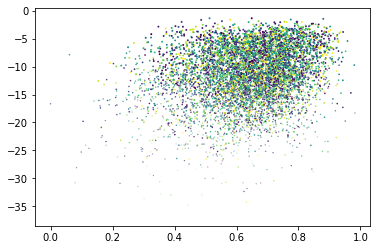

In [62]:
plt.scatter(big_df1_clean.iloc[:,0], big_df1_clean.iloc[:,3], big_df1_clean.iloc[:,1],big_df1_clean.iloc[:,2]);

# Cluster 1

In [63]:
kmeans1 = KMeans(n_clusters = 31)

In [64]:
cluster1 = kmeans1.fit(big_df1_clean )

In [65]:
cluster1.cluster_centers_

array([[ 6.56637874e-01,  3.08466213e-01,  5.70099668e+00,
        -1.37180432e+01,  5.34883721e-01,  1.03681063e-01,
         6.62173289e-01,  7.28921041e-01,  1.56182724e-01,
         3.93401993e-01,  1.08592150e+02,  1.15222372e+05,
         3.89036545e+00],
       [ 6.42146919e-01,  6.18106635e-01,  5.36966825e+00,
        -8.44563507e+00,  6.25592417e-01,  1.53275355e-01,
         2.84727701e-01,  8.08292932e-02,  1.82380569e-01,
         5.58416114e-01,  1.12301725e+02,  2.37764133e+05,
         3.96682464e+00],
       [ 5.58903226e-01,  4.57600000e-01,  5.54838710e+00,
        -1.09193871e+01,  4.19354839e-01,  6.88935484e-02,
         6.19320645e-01,  3.62552491e-01,  1.84238710e-01,
         4.98296774e-01,  1.16873387e+02,  4.60212419e+05,
         3.74193548e+00],
       [ 6.35194332e-01,  3.25364372e-01,  5.41497976e+00,
        -1.36333664e+01,  5.64777328e-01,  9.08008097e-02,
         6.49614453e-01,  6.17945409e-01,  1.64482996e-01,
         3.84828138e-01,  1.11705530e

In [66]:
cluster1.labels_

array([18, 26, 28, ..., 20, 25, 29], dtype=int32)

In [67]:
big_df1_clean_c = big_df1_clean.copy()
big_df1_clean_c['cluster1'] = cluster1.labels_
big_df1_clean_c.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster1
"Sing About Me, I'm Dying Of Thirst",0.654,0.753,11,-7.556,0,0.3950,0.303,0.000081,0.130,0.3710,110.722,723573,5,18
Yonkers,0.712,0.759,11,-5.397,1,0.3340,0.016,0.080800,0.217,0.7380,79.103,249333,4,26
Angel Duster,0.507,0.810,6,-6.840,1,0.1050,0.003,0.000008,0.314,0.2070,175.710,309840,5,28
Rhymes Like Dimes,0.644,0.751,0,-5.652,1,0.2680,0.662,0.000000,0.170,0.7590,99.948,258613,4,22
The Last to Say,0.684,0.397,2,-10.319,1,0.0809,0.210,0.000000,0.235,0.0542,83.027,256348,4,22


In [68]:
big_df1_clean_c["cluster1"].value_counts()

23    538
3     494
14    486
19    483
9     441
20    414
5     391
29    384
10    337
16    319
0     301
25    279
30    226
1     211
7     198
22    170
26    168
8     118
15    117
27    100
28     92
12     74
4      71
21     61
11     51
17     36
2      31
24     17
6      13
18      4
13      2
Name: cluster1, dtype: int64

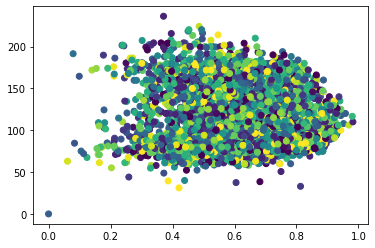

In [69]:
plt.scatter(big_df1_clean_c.iloc[:,0], big_df1_clean_c.iloc[:,10], c = big_df1_clean_c.iloc[:,-1]);

In [70]:
big_df1_clean_c.to_csv(r'Songs_Big_Clusters.csv', index = False)

In [71]:
markersize= big_df1_clean_c['tempo']
markercolour= big_df1_clean_c['cluster1']

fig1=go.Scatter3d(x=big_df1_clean_c['danceability'],
                  y=big_df1_clean_c['energy'],
                  z=big_df1_clean_c['acousticness'],
                 marker=dict (size=markersize,
                              color=markercolour,
                              opacity=0.9,
                              colorscale='Reds'),
                 line=dict (width=0.2),
                 mode='markers')
#make layout 
mylayout=go.Layout(scene=dict(xaxis=dict(title="danceability"),
                              yaxis=dict(title='energy'),
                              zaxis=dict(title='acousticness')))

In [72]:
plotly.offline.plot({"data":[fig1],
                    "layout":mylayout},
                   auto_open=True,
                   filename=("5Dplot.html"))

'5Dplot.html'

# Scalar

In [73]:
from sklearn.preprocessing import StandardScaler 

In [74]:
big_df1_clean_scaled=StandardScaler().fit_transform(big_df1_clean)

In [75]:
big_df1_clean.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature'],
      dtype='object')

In [76]:
big_df1_clean_scaled_df=pd.DataFrame(big_df1_clean_scaled,columns=['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature'])

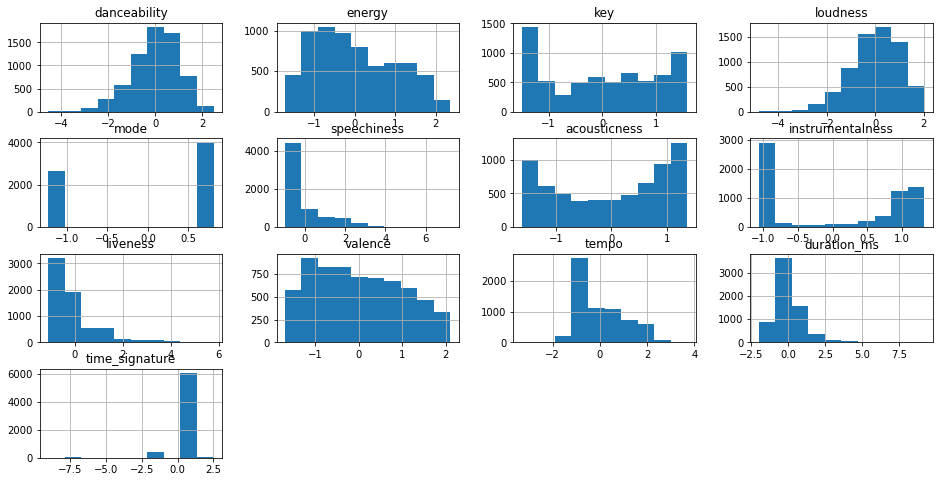

In [77]:
big_df1_clean_scaled_df.hist(figsize = (16,8));

# Finding the Optimal K

In [78]:
kmeans1.inertia_

95075858628.45651

In [79]:
kmeans2 = KMeans(n_clusters = 50)
kmeans2.fit(big_df1_clean_scaled_df)
print(kmeans2.inertia_)

29543.659042179956


In [80]:
K = range(5,40)

In [81]:
inertia1 =[]
for k in K:
    kmeans3 = KMeans(n_clusters = k, random_state = 40)
    kmeans3.fit(big_df1_clean_scaled_df)
    inertia1.append(kmeans3.inertia_)
    
print(inertia1)

[56161.49403629101, 53340.31044309369, 51517.3161036165, 49105.87920014304, 47645.97722475293, 46364.558296810676, 45099.10497248829, 44026.64685473396, 43055.04397175455, 42057.86003041039, 41181.85510769637, 40608.14094148413, 39686.183242433246, 39050.72564423795, 38449.20452386464, 37862.07973266082, 37360.37482646438, 36806.17103364068, 36449.735262319075, 35991.908982158304, 35472.56277571818, 35119.06589740718, 34744.14615680381, 34366.10133362364, 34144.13482437989, 33918.384350922526, 33533.33487332822, 33315.85901263837, 33131.8030366579, 32844.39299723082, 32527.711154326, 32296.90641187789, 32017.398032322053, 31810.58791471836, 31732.380104169137]


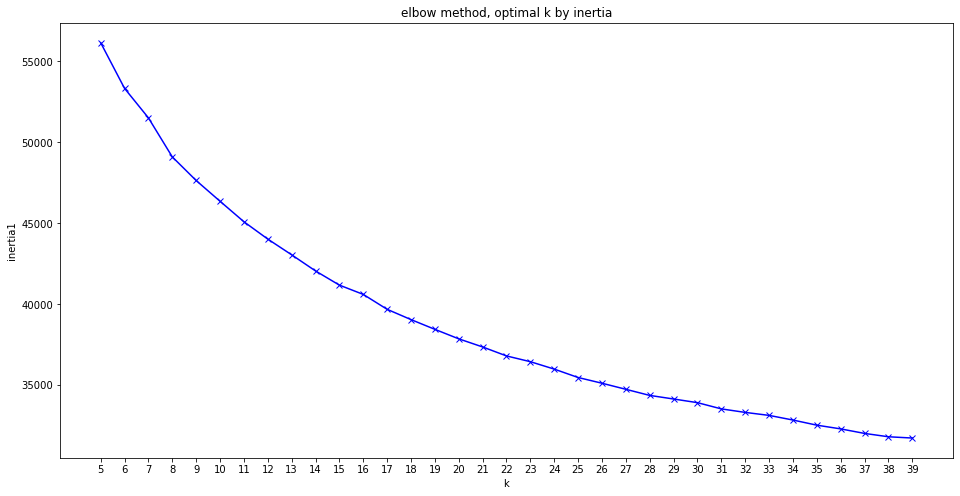

In [82]:
plt.figure(figsize = (16,8))
plt.plot(K, inertia1, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia1')
plt.xticks(np.arange(min(K), max(K) + 1, 1.0))
plt.title('elbow method, optimal k by inertia');

The best k seems to be 31

# Cluster with k = 31

In [83]:
kmeans4 = KMeans(n_clusters = 31)

In [84]:
cluster4 = kmeans4.fit(big_df1_clean_scaled)

In [85]:
cluster4.cluster_centers_

array([[ 8.26314123e-01,  2.97402229e-02, -1.96094928e-01,
         2.59872447e-01,  8.11167982e-01, -1.64987633e-01,
        -5.84386008e-01,  7.18268748e-01, -1.81089483e-01,
         3.89532898e-02, -6.86587552e-01, -6.42692571e-01,
         1.80122700e-01],
       [ 6.00197851e-01,  1.76090315e-02,  2.57907628e-01,
         2.09918245e-01, -1.23279028e+00, -1.60716374e-01,
        -9.37675165e-01,  7.15077652e-01, -1.32034615e-01,
        -1.17456947e-01, -6.11216461e-01, -4.98978300e-01,
         1.66477240e-01],
       [-5.52863060e-01,  5.44606181e-01, -5.42777802e-01,
         7.46398642e-01,  6.23648876e-01, -4.40626485e-01,
        -9.65270476e-01, -9.19084066e-01, -1.34711874e-01,
        -5.64834762e-01, -2.66920609e-01,  7.25290994e-01,
         7.14064666e-02],
       [-3.85177680e-01, -2.91057198e-01, -2.44984433e-01,
        -3.34558551e-02, -1.23279028e+00, -3.47258765e-01,
         5.05007986e-01, -8.10606524e-01, -1.07971027e-01,
         6.46361551e-01,  2.86313274e

In [86]:
cluster4.labels_

array([21, 15, 18, ..., 23, 12,  2], dtype=int32)

In [87]:
big_df1_clean_scaled_c = big_df1_clean_scaled_df.copy()
big_df1_clean_scaled_c["cluster"] = cluster4.labels_
big_df1_clean_scaled_c.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,0.128148,1.362467,1.589644,0.819763,-1.232790,2.532209,-0.708417,-1.061662,-0.318894,-0.273225,-0.026054,7.745734,2.516225,21
1,0.542862,1.387188,1.589644,1.237063,0.811168,1.989791,-1.567498,-0.869078,0.311648,1.140602,-0.964984,0.973864,0.198962,15
2,-0.922937,1.597313,0.184360,0.958154,0.811168,-0.046499,-1.606411,-1.061836,1.014666,-0.905017,1.903773,1.837869,2.516225,18
3,0.056646,1.354227,-1.501981,1.187776,0.811168,1.402913,0.366183,-1.061855,-0.028990,1.221502,-0.345989,1.106377,0.198962,15
4,0.342656,-0.104292,-0.939867,0.285720,0.811168,-0.260798,-0.986795,-1.061855,0.442105,-1.493662,-0.848460,1.074035,0.198962,2


In [88]:
big_df1_clean_scaled_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6627 entries, 0 to 6626
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      6627 non-null   float64
 1   energy            6627 non-null   float64
 2   key               6627 non-null   float64
 3   loudness          6627 non-null   float64
 4   mode              6627 non-null   float64
 5   speechiness       6627 non-null   float64
 6   acousticness      6627 non-null   float64
 7   instrumentalness  6627 non-null   float64
 8   liveness          6627 non-null   float64
 9   valence           6627 non-null   float64
 10  tempo             6627 non-null   float64
 11  duration_ms       6627 non-null   float64
 12  time_signature    6627 non-null   float64
 13  cluster           6627 non-null   int32  
dtypes: float64(13), int32(1)
memory usage: 699.1 KB


plotly.offline.plot({"data":[fig2],
                    "layout":mylayout2},
                   auto_open=True,
                   filename=("5Dplot.html"))

# Create final dataframe

In [89]:
cluster_column = big_df1_clean_scaled_c["cluster"].to_list()

In [90]:
songname_column = big_df1["song_name"].to_list()

In [91]:
artist_column = big_df1["song_artist"].to_list()

In [92]:
songid_column = big_df1["song_ID"].to_list()

In [93]:
final_df=pd.DataFrame({"song_name":songname_column, "song_ID":songid_column, "artist":artist_column, "cluster":cluster_column})

In [94]:
final_df

,song_name,song_ID,artist,cluster
0,"Sing About Me, I'm Dying Of Thirst",1Z2FvDFZSDQ23s4BDqpWqZ,Kendrick Lamar,21
1,Yonkers,4OKXvqtfwlvY2fYJ2lzHPH,"Tyler, The Creator",15
2,Angel Duster,0VLYOGNIaiOxEHKWOctcA4,Run The Jewels,18
3,Rhymes Like Dimes,12OkZyDWNBLUqoReoseGrc,MF DOOM,15
4,The Last to Say,4O7P2Rug3l4IySk0TEx4Xe,Atmosphere,2
...,...,...,...,...
6622,Moth To A Flame (with The Weeknd),2gpWyfu7eZ01zzncHpxOtA,Swedish House Mafia,2
6623,'Til You Can't,13rC4iKtfQocWIfzPOJxaT,Cody Johnson,18
6624,Woman,6Uj1ctrBOjOas8xZXGqKk4,Doja Cat,23
6625,Take My Breath,6OGogr19zPTM4BALXuMQpF,The Weeknd,12


In [95]:
final_df.loc[final_df['song_name'] == "goodnight"]

,song_name,song_ID,artist,cluster
4542,goodnight,7o6pBUyCm2rdHeeJ66W39i,L.Dre,1


# Creating recomender:

In [96]:
from unidecode import unidecode

In [97]:
for song, artist in final_df.iterrows( ):
    hs = input("""Please type your favourite song or artist of the moment:
    
""")
    hs2 = unidecode(hs.lower().replace(" ",""))
    check = final_df[final_df['song_name'].str.lower().str.replace(" ","").apply(unidecode).str.contains(hs2)] + final_df[final_df['artist'].str.lower().str.replace(" ","").apply(unidecode).str.contains(hs2)]
    suggestion1 = top_100.sample().index.tolist()
    check2 = top_100[top_100['song_name'].str.lower().str.replace(" ","").apply(unidecode).str.contains(hs2)] + top_100[top_100['song_artist'].str.lower().str.replace(" ","").apply(unidecode).str.contains(hs2)]
    index = check.index.tolist()
    if len(check) != 0 or len(check2) != 0:
        answer = input("""
Do you mean """ + final_df.song_name[index].values[0] + """ by """ + final_df.artist[index].values[0] + """?
[y/n]
         
""")
        if answer.lower() == 'y':
            song_cluster = final_df.loc[index, 'cluster'].iloc[0]
            
            if len(check2) != 0:
                
                print("""
Good choice! Your song was one of the Top 100 hot songs in Spain last week!
We think you could enjoy """ + top_100['song_name'][suggestion1].item() + """ by """ + top_100['song_artist'][suggestion1].item() + """.""")
                break
            else:
                final_df_mask = final_df['cluster']== song_cluster
                final_df_filtered = final_df[final_df_mask]
                suggestion2 = final_df_filtered.sample().index.tolist()

                print("""
Interesting choice!
Your song wasn't one of the Top 100 hot songs in Spain last week but it is in our database.
Why don't you try """ + final_df['song_name'][suggestion2].item() + """ by """ + final_df['artist'][suggestion2].item() + """?""")
                break
        else:
            print("""
Wow, we weren't expecting that choice!
Unfortunatelly, we don't have that song or artist in our database, so probably it's not a hot song in this moment.
Could you tell us another one?
            
            """)
            continue
    else:
        print("""
Wow, we weren't expecting that choice!
Unfortunatelly, we don't have that song or artist in our database, so probably it's not a hot song in this moment.
Could you tell us another one?
            
            """)
        continue



Please type your favourite song or artist of the moment:
    
la fama

Do you mean LA FAMA (with The Weeknd) by ROSALÍA?
[y/n]
         
y

Good choice! Your song was one of the Top 100 hot songs in Spain last week!
We think you could enjoy After Last Night (with Thundercat & Bootsy Collins) by Bruno Mars.


## Extra Songs Playlist 2

- **user name:** "Acclaimed Music"
- **playlist id:** "1G8IpkZKobrIlXcVPoSIuf"

In [98]:
results8=get_playlist_tracks("Acclaimed Music","1G8IpkZKobrIlXcVPoSIuf")

In [127]:
song_name7=[]
song_ID7=[]
song_artist7=[]
playlist=results8

for r in [x for x in range(10000) if x != 467 and x!= 7173]:
    song_ID7.append(results8[r]["track"]["id"])
for r in [x for x in range(10000) if x != 467 and x!= 7173]:
    song_name7.append(results8[r]["track"]["name"])
for r in [x for x in range(10000) if x != 467 and x!= 7173]:
    song_artist7.append(results8[r]["track"]["artists"][0]["name"])

playlist_song_info6 = pd.DataFrame({"song_name":song_name7,"song_ID":song_ID7,"song_artist":song_artist7})